In [1]:
import numpy as np
import time
import random
import sys

In [2]:
display_plots = True
save_pdfs     = False

In [3]:
import matplotlib
if save_pdfs == True:
    #Need to do this to save pdf plots when using remote connection
    matplotlib.use("pdf");

import matplotlib.pyplot as plt

In [4]:
sys.path.append( r"c:\Users\emeraldgeomodelling\Software\ga-aem-emrld\python" )
from gatdaem1d import tdlib
from gatdaem1d import TDAEMSystem
from gatdaem1d import Earth
from gatdaem1d import Geometry
from gatdaem1d import Response

## Construct the AEM system class instance

In [5]:

#stmfile = "../../examples/bhmar-skytem/stmfiles/Skytem-HM.stm";
stmfile  = "..\\..\\examples\\bhmar-skytem\\stmfiles\\Skytem-LM.stm"
S = TDAEMSystem(stmfile)

#Print the window times
S.windows.print()


Number of windows =  18
    1 0.00001539 0.00001900
    2 0.00001939 0.00002400
    3 0.00002439 0.00003100
    4 0.00003139 0.00003900
    5 0.00003939 0.00004900
    6 0.00004939 0.00006200
    7 0.00006239 0.00007800
    8 0.00007839 0.00009900
    9 0.00009939 0.00012500
   10 0.00012539 0.00015700
   11 0.00015739 0.00019900
   12 0.00019939 0.00025000
   13 0.00025039 0.00031500
   14 0.00031539 0.00039700
   15 0.00039739 0.00050000
   16 0.00050039 0.00063000
   17 0.00063039 0.00079300
   18 0.00079339 0.00099900


## Plot the waveform and window positions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


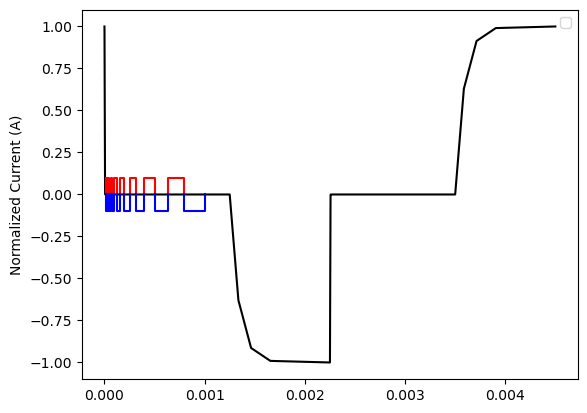

In [6]:
fig1 = plt.figure(1)
#S.waveform.print(); #Too much printing
S.waveform_windows_plot(fig1);
fig1.gca().legend()
if display_plots: plt.show(fig1)
if save_pdfs: plt.savefig("figure1.pdf", dpi=300, facecolor='w', 
                          edgecolor='w',
                          orientation='portrait', 
                          papertype=None, format=None, 
                          transparent=False, 
                          bbox_inches=None, pad_inches=0.1, frameon=None)

## Set the conductivity and thicknesses

In [7]:
conductivity = [0.01, 0.1, 0.001];
thickness    = [40, 20];
E = Earth(conductivity,thickness);
E.print();


nlayers      = 3
conductivity = [0.01  0.1   0.001]
thickness    = [40. 20.]


## Set the system geometry

In [8]:
G = Geometry(tx_height=35, txrx_dx = -12.62, txrx_dz = +2.16);
G.print();

Tx height  35
Tx roll    0
Tx pitch   0
Tx yaw     0
Tx-Rx dx   -12.62
Tx-Rx dy   0
Tx-Rx dz   2.16
Rx roll    0
Rx pitch   0
Rx yaw     0


## Run a few random forward models in a loop

In [9]:
t1=time.time()
for i in range(10):
    conductivity[0] = 10**(random.uniform(-3, 0))
    conductivity[1] = 10**(random.uniform(-3, 0))
    conductivity[2] = 10**(random.uniform(-3, 0))
    thickness       = [40, 20]
    E = Earth(conductivity,thickness)
    fm = S.forwardmodel(G,E)
t2=time.time()
print("Time = ",t2-t1);

Time =  0.012685060501098633


## Set another earth nodel

In [10]:
conductivity = [0.005, 0.2, 0.01]
thickness    = [20, 10]
E = Earth(conductivity,thickness)
print("\nEarth model:")
E.print()


Earth model:
nlayers      = 3
conductivity = [0.005 0.2   0.01 ]
thickness    = [20. 10.]


## Do a forward model

In [11]:
print("\nForward model:")
fm = S.forwardmodel(G,E); fm.print()


Forward model:
 Window       SX               SY               SZ
    1     3.610079e-10    -1.778026e-39    -1.799299e-09
    2     2.970649e-10    -2.506337e-39    -1.519228e-09
    3     2.420803e-10    -1.688051e-39    -1.284213e-09
    4     1.926391e-10    -1.528307e-39    -1.069462e-09
    5     1.494630e-10    -1.267072e-39    -8.739623e-10
    6     1.108065e-10    -1.473408e-39    -6.890431e-10
    7     7.836628e-11    -1.481264e-39    -5.232145e-10
    8     5.247355e-11    -1.398284e-39    -3.801456e-10
    9     3.322134e-11    -1.419279e-39    -2.639395e-10
   10     2.012773e-11    -1.393647e-39    -1.767673e-10
   11     1.151784e-11    -1.307977e-39    -1.129257e-10
   12     6.248988e-12    -1.256580e-39    -6.903647e-11
   13     3.255043e-12    -1.158402e-39    -4.077264e-11
   14     1.617661e-12    -9.856194e-40    -2.310737e-11
   15     7.712836e-13    -7.852900e-40    -1.263524e-11
   16     3.583936e-13    -5.760331e-40    -6.708770e-12
   17     1.579457e-1

## Then these derivative apply to the last forward model computed

In [12]:
print("\nLayer 1 conductivity derivative")
dl1c = S.derivative(S.CONDUCTIVITYDERIVATIVE,1); dl1c.print()
print("\nLayer 2 conductivity derivative")
dl2c = S.derivative(S.CONDUCTIVITYDERIVATIVE,2); dl2c.print()
print("\nLayer 3 conductivity derivative")
dl3c = S.derivative(S.CONDUCTIVITYDERIVATIVE,3); dl3c.print()
print("\nLayer 1 thickness derivative")
dl1t = S.derivative(S.THICKNESSDERIVATIVE,1); dl1t.print()
print("\nLayer 2 thickness derivative")
dl2t=S.derivative(S.THICKNESSDERIVATIVE,2); dl2t.print()


Layer 1 conductivity derivative
 Window       SX               SY               SZ
    1     7.032825e-09    -1.778026e-39    -3.379219e-08
    2     3.814584e-09    -2.506337e-39    -1.667677e-08
    3     2.633926e-09    -1.688051e-39    -1.093363e-08
    4     2.055168e-09    -1.528307e-39    -8.655313e-09
    5     1.623827e-09    -1.267072e-39    -7.138676e-09
    6     1.240964e-09    -1.473408e-39    -5.807308e-09
    7     9.185258e-10    -1.481264e-39    -4.623224e-09
    8     6.445021e-10    -1.398284e-39    -3.533334e-09
    9     4.318144e-10    -1.419279e-39    -2.604076e-09
   10     2.762980e-10    -1.393647e-39    -1.846721e-09
   11     1.673803e-10    -1.307977e-39    -1.251072e-09
   12     9.579352e-11    -1.256580e-39    -8.073160e-10
   13     5.228028e-11    -1.158402e-39    -4.998474e-10
   14     2.700487e-11    -9.856194e-40    -2.944295e-10
   15     1.319836e-11    -7.852900e-40    -1.654066e-10
   16     6.230736e-12    -5.760331e-40    -8.919174e-11
   1

In [13]:
print("\nHeight derivative")
ddh=S.derivative(S.HDERIVATIVE,-1); ddh.print()
print("\nHorizontal radial-distance derivative")
ddr=S.derivative(S.RDERIVATIVE,-1); ddr.print()
print("\nHorizontal dx distance derivative")
ddx=S.derivative(S.XDERIVATIVE,-1); ddx.print()
print("\nHorizontal dy distance derivative")
ddy=S.derivative(S.YDERIVATIVE,-1); ddy.print()
print("\nVertical dz distance derivative")
ddz=S.derivative(S.ZDERIVATIVE,-1); ddz.print()


Height derivative
 Window       SX               SY               SZ
    1    -2.773969e-11    -1.778026e-39     1.103353e-10
    2    -2.222214e-11    -2.506337e-39     9.097867e-11
    3    -1.744538e-11    -1.688051e-39     7.433408e-11
    4    -1.325867e-11    -1.528307e-39     5.932628e-11
    5    -9.764133e-12    -1.267072e-39     4.616680e-11
    6    -6.805668e-12    -1.473408e-39     3.433293e-11
    7    -4.482137e-12    -1.481264e-39     2.435710e-11
    8    -2.765165e-12    -1.398284e-39     1.635898e-11
    9    -1.595346e-12    -1.419279e-39     1.038675e-11
   10    -8.734638e-13    -1.393647e-39     6.309104e-12
   11    -4.469184e-13    -1.307977e-39     3.618517e-12
   12    -2.146765e-13    -1.256580e-39     1.967027e-12
   13    -9.819181e-14    -1.158402e-39     1.026267e-12
   14    -4.268520e-14    -9.856194e-40     5.106558e-13
   15    -1.762640e-14    -7.852900e-40     2.437290e-13
   16    -7.158740e-15    -5.760331e-40     1.133366e-13
   17    -2.601794

## PLot the responses

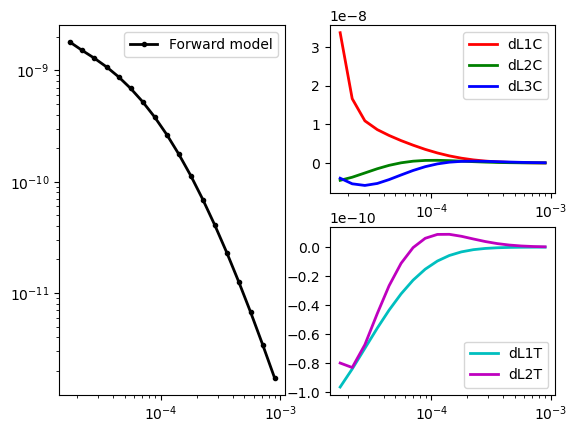

In [14]:

fig2 = plt.figure(2)
ax1 = plt.subplot2grid((2,2), (0,0), rowspan=2)
ax1.loglog(S.windows.centre,-fm.SZ,'.-k',linewidth=2,label='Forward model')
ax1.legend(fontsize=10)

ax2 = fig2.add_subplot(2,2,2)
ax2.semilogx(S.windows.centre,-dl1c.SZ,'-r',linewidth=2,label='dL1C')
ax2.semilogx(S.windows.centre,-dl2c.SZ,'-g',linewidth=2,label='dL2C')
ax2.semilogx(S.windows.centre,-dl3c.SZ,'-b',linewidth=2,label='dL3C')
ax2.legend(fontsize=10)

ax3 = fig2.add_subplot(2,2,4)
ax3.semilogx(S.windows.centre,-dl1t.SZ,'-c',linewidth=2,label='dL1T')
ax3.semilogx(S.windows.centre,-dl2t.SZ,'-m',linewidth=2,label='dL2T')
ax3.legend(fontsize=10)
if display_plots: 
    plt.show(fig2)
if save_pdfs: 
    plt.savefig("figure2.pdf", dpi=300, facecolor='w', 
                edgecolor='w', orientation='portrait', 
                papertype=None, format=None, transparent=False,
                bbox_inches=None, pad_inches=0.1, frameon=None)


In [15]:
(8*5000)/60/60

11.11111111111111

In [16]:
(13*5000)/60/60/4

4.513888888888888